In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
songs = pd.read_csv("df_audio_features_1000.csv")
songs.set_index(["name", "artist"], inplace=True)
#songs


In [360]:
from sklearn.preprocessing import MinMaxScaler
songs_scaled_minmax = MinMaxScaler().fit_transform(songs)

In [361]:
songs_scaled_minmax = pd.DataFrame(songs_scaled_minmax, columns = songs.columns, index = songs.index)
#songs_scaled_minmax

In [362]:
from sklearn.preprocessing import StandardScaler
songs_scaled_standard = StandardScaler().fit_transform(songs)

In [363]:
songs_scaled_standard = pd.DataFrame(songs_scaled_standard, columns = songs.columns, index = songs.index)
#songs_scaled_standard

In [364]:
from sklearn.cluster import KMeans
songs_kmeans = KMeans(n_clusters = 4)
songs_kmeans.fit(songs_scaled_minmax)

KMeans(n_clusters=4)

In [365]:
clusters = songs_kmeans.predict(songs_scaled_minmax)
songs_scaled_minmax['clusters'] = clusters
songs_scaled_minmax.head()
songs_scaled_minmax.groupby("clusters").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
clusters,,,,,,,,,,,,,
0,0.635117,0.654677,0.443020,0.813984,1.0,0.147595,0.273491,0.037816,0.172896,0.619012,0.452066,0.045169,0.738906
1,0.304168,0.182256,0.509457,0.564519,0.0,0.040044,0.883554,0.574740,0.143853,0.199311,0.345269,0.090631,0.711409
2,0.284701,0.170485,0.441339,0.559893,1.0,0.037980,0.908421,0.449917,0.147133,0.194761,0.345433,0.089425,0.676520
3,0.660957,0.686298,0.530254,0.829416,0.0,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464,0.049432,0.741158


In [366]:
songs_kmeans.labels_

array([0, 0, 2, ..., 2, 2, 2], dtype=int32)

In [367]:
songs_kmeans.cluster_centers_

array([[ 6.35117205e-01,  6.54676673e-01,  4.43019738e-01,
         8.13984243e-01,  1.00000000e+00,  1.47595242e-01,
         2.73491346e-01,  3.78156191e-02,  1.72895672e-01,
         6.19012442e-01,  4.52065747e-01,  4.51687696e-02,
         7.38906498e-01],
       [ 3.04168435e-01,  1.82256217e-01,  5.09456986e-01,
         5.64518920e-01, -3.33066907e-16,  4.00438524e-02,
         8.83554080e-01,  5.74740184e-01,  1.43853002e-01,
         1.99310923e-01,  3.45268513e-01,  9.06314043e-02,
         7.11409396e-01],
       [ 2.84700847e-01,  1.70485001e-01,  4.41339066e-01,
         5.59892750e-01,  1.00000000e+00,  3.79798666e-02,
         9.08420632e-01,  4.49916811e-01,  1.47133406e-01,
         1.94761029e-01,  3.45432610e-01,  8.94250630e-02,
         6.76520270e-01],
       [ 6.60957292e-01,  6.86297988e-01,  5.30254312e-01,
         8.29416454e-01, -8.88178420e-16,  1.61230636e-01,
         2.05942420e-01,  4.83230953e-02,  1.52803643e-01,
         5.86949614e-01,  4.68464443e

In [368]:
songs_scaled_minmax['clusters'] = songs_kmeans.labels_

In [369]:
songs_scaled_minmax.groupby("clusters").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
clusters,,,,,,,,,,,,,
0,0.635117,0.654677,0.443020,0.813984,1.0,0.147595,0.273491,0.037816,0.172896,0.619012,0.452066,0.045169,0.738906
1,0.304168,0.182256,0.509457,0.564519,0.0,0.040044,0.883554,0.574740,0.143853,0.199311,0.345269,0.090631,0.711409
2,0.284701,0.170485,0.441339,0.559893,1.0,0.037980,0.908421,0.449917,0.147133,0.194761,0.345433,0.089425,0.676520
3,0.660957,0.686298,0.530254,0.829416,0.0,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464,0.049432,0.741158


In [370]:
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
0,0.572154,0.565314,0.766506,8.079897e-01,0.127361,0.387785,0.141104,0.167063,0.539122,0.432178,0.80799
1,0.660957,0.686298,0.829416,-8.881784e-16,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464,2.00000
2,0.287866,0.173456,0.562190,1.000000e+00,0.038364,0.907312,0.443922,0.148140,0.198616,0.345255,3.00000


In [371]:
list(songs_scaled_minmax)

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'clusters']

In [372]:
centroids = songs_kmeans.cluster_centers_

In [373]:
centroids = pd.DataFrame(centroids)
centroids.columns = ['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']
centroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.635117,0.654677,0.443020,0.813984,1.000000e+00,0.147595,0.273491,0.037816,0.172896,0.619012,0.452066,0.045169,0.738906
1,0.304168,0.182256,0.509457,0.564519,-3.330669e-16,0.040044,0.883554,0.574740,0.143853,0.199311,0.345269,0.090631,0.711409
2,0.284701,0.170485,0.441339,0.559893,1.000000e+00,0.037980,0.908421,0.449917,0.147133,0.194761,0.345433,0.089425,0.676520
3,0.660957,0.686298,0.530254,0.829416,-8.881784e-16,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464,0.049432,0.741158


In [374]:
songs_scaled_minmax.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
name,artist,,,,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.181818,0.723440,1.0,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187,0.016023,0.75,0
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75,0
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75,2
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75,0
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75,2


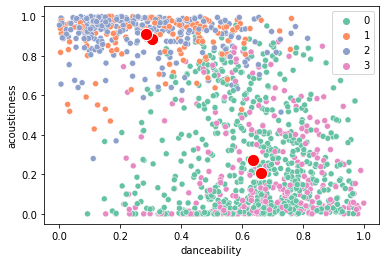

In [375]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='acousticness', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='acousticness', color='red', s=150)
plt.show()

In [376]:
songs_kmeans.inertia_

611.1785058103061

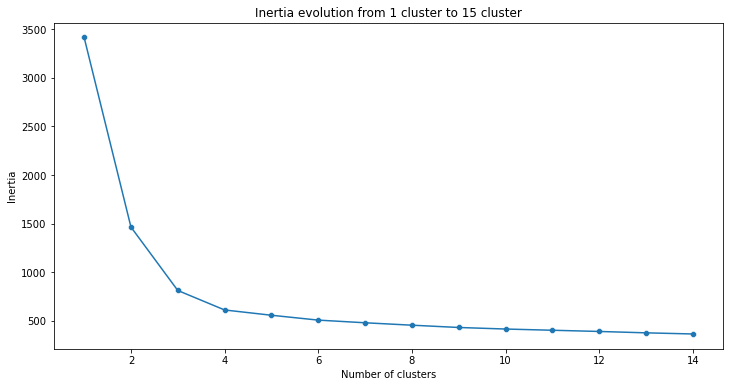

In [377]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_minmax).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [378]:
from sklearn.metrics import silhouette_score
silhouette_score(songs_scaled_minmax, songs_kmeans.labels_)

0.5290049475455845

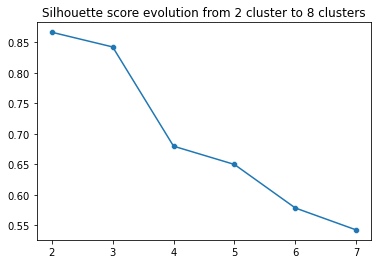

In [379]:
max_k = 8
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(songs).labels_
    sil_score.append(silhouette_score(songs
                                      
                                      
                                      , labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

In [380]:
songs_scaled_minmax

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
name,artist,,,,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.181818,0.723440,1.0,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187,0.016023,0.75,0
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75,0
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75,2
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75,0
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50,2


In [381]:
songs_scaled_minmax.drop(columns = ["duration_ms", "time_signature", "key"], axis=1, inplace=True)

In [382]:
centroids.drop(columns = ["duration_ms", "time_signature", "key"], axis=1, inplace=True)
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.635117,0.654677,0.813984,1.000000e+00,0.147595,0.273491,0.037816,0.172896,0.619012,0.452066
1,0.304168,0.182256,0.564519,-3.330669e-16,0.040044,0.883554,0.574740,0.143853,0.199311,0.345269
2,0.284701,0.170485,0.559893,1.000000e+00,0.037980,0.908421,0.449917,0.147133,0.194761,0.345433
3,0.660957,0.686298,0.829416,-8.881784e-16,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464


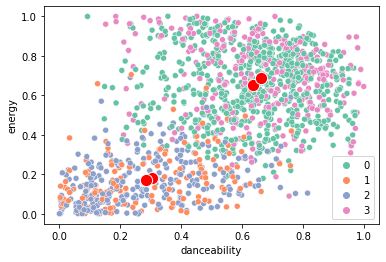

In [383]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='energy', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

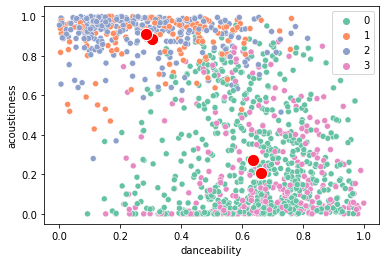

In [384]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='acousticness', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='acousticness', color='red', s=150)
plt.show()

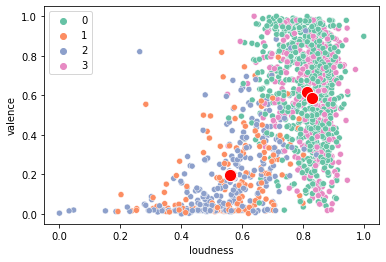

In [385]:
sns.scatterplot(data=songs_scaled_minmax, x='loudness', y='valence', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='loudness', y='valence', color='red', s=150)
plt.show()

In [386]:
songs_kmeans.inertia_

611.1785058103061

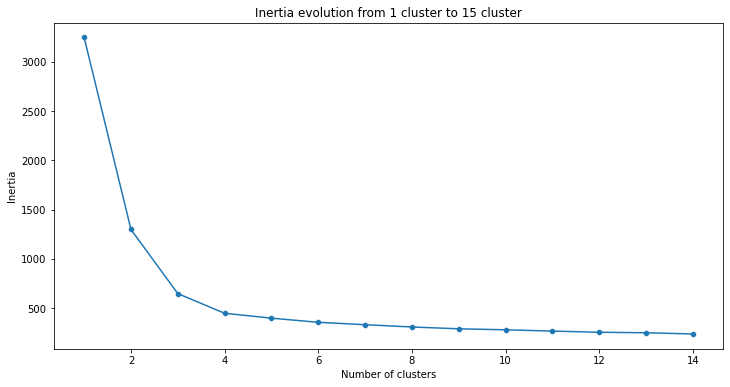

In [387]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_minmax).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [388]:
from sklearn.metrics import silhouette_score
silhouette_score(songs_scaled_minmax, songs_kmeans.labels_)

0.5880961628259287

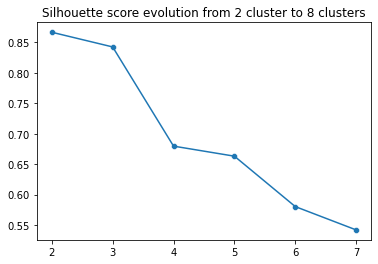

In [389]:
max_k = 8
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(songs).labels_
    sil_score.append(silhouette_score(songs
                                      
                                      
                                      , labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

In [390]:
from sklearn.cluster import KMeans
songs_kmeans = KMeans(n_clusters = 3)
songs_kmeans.fit(songs_scaled_minmax)

KMeans(n_clusters=3)

In [391]:
songs_scaled_minmax['clusters'] = songs_kmeans.labels_

In [392]:
songs_scaled_minmax.groupby("clusters").mean()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
clusters,,,,,,,,,,
0,0.635117,0.654677,0.813984,1.000000,0.147595,0.273491,0.037816,0.172896,0.619012,0.452066
1,0.660957,0.686298,0.829416,0.000000,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464
2,0.291219,0.174426,0.561442,0.665169,0.038671,0.900095,0.491712,0.146035,0.196284,0.345378


In [393]:
centroids = songs_kmeans.cluster_centers_
centroids

array([[ 6.35117205e-01,  6.54676673e-01,  8.13984243e-01,
         1.00000000e+00,  1.47595242e-01,  2.73491346e-01,
         3.78156191e-02,  1.72895672e-01,  6.19012442e-01,
         4.52065747e-01, -1.55431223e-15],
       [ 6.60957292e-01,  6.86297988e-01,  8.29416454e-01,
        -8.88178420e-16,  1.61230636e-01,  2.05942420e-01,
         4.83230953e-02,  1.52803643e-01,  5.86949614e-01,
         4.68464443e-01,  3.00000000e+00],
       [ 2.91219208e-01,  1.74426374e-01,  5.61441737e-01,
         6.65168539e-01,  3.86709540e-02,  9.00094528e-01,
         4.91711603e-01,  1.46035023e-01,  1.96284477e-01,
         3.45377665e-01,  1.66516854e+00]])

In [394]:
songs_scaled_minmax.head()

,,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.723440,1.0,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187,0
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,2
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,2


In [395]:
centroids = pd.DataFrame(centroids)
centroids

,0,1,2,3,4,5,6,7,8,9,10
0,0.635117,0.654677,0.813984,1.000000e+00,0.147595,0.273491,0.037816,0.172896,0.619012,0.452066,-1.554312e-15
1,0.660957,0.686298,0.829416,-8.881784e-16,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464,3.000000e+00
2,0.291219,0.174426,0.561442,6.651685e-01,0.038671,0.900095,0.491712,0.146035,0.196284,0.345378,1.665169e+00


In [396]:
list(songs_scaled_minmax)

['danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'clusters']

In [397]:
centroids.columns = ['danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'clusters']
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
0,0.635117,0.654677,0.813984,1.000000e+00,0.147595,0.273491,0.037816,0.172896,0.619012,0.452066,-1.554312e-15
1,0.660957,0.686298,0.829416,-8.881784e-16,0.161231,0.205942,0.048323,0.152804,0.586950,0.468464,3.000000e+00
2,0.291219,0.174426,0.561442,6.651685e-01,0.038671,0.900095,0.491712,0.146035,0.196284,0.345378,1.665169e+00


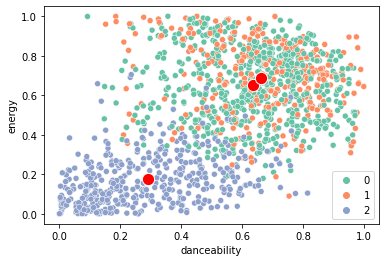

In [398]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='energy', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

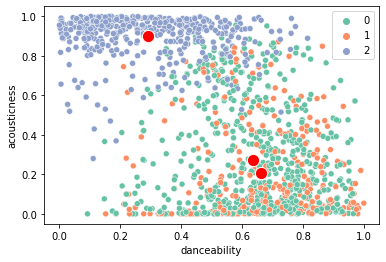

In [399]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='acousticness', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='acousticness', color='red', s=150)
plt.show()

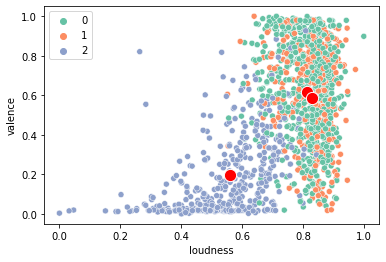

In [400]:
sns.scatterplot(data=songs_scaled_minmax, x='loudness', y='valence', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='loudness', y='valence', color='red', s=150)
plt.show()